# 2020/21 English Premier League Players Data Analysis
#### By: Guilherme Teixeira de Mello

### Summary:
* Introduction
* Data Preparation
    * Gather
    * Assess
    * Clean
* Data Analysis
* Conclusion

## Introduction

> This project was made in order to understand how some English Premier League players performed throughout the season, and here I will use data [from this Kaggle page.](https://www.kaggle.com/rajatrc1705/english-premier-league202021)

The data has some interesting variables that I would like to consider when posing some questions, for example, here we have columns for which `Club` the player plays for, the `Nationality` of the player, the `Position` in which the player is most confortable playing, the number of `Goals` and `Assists` each player has taken and given, respectivelly, and some other interesting variables that can give us some more in-depth understanding about Premier league players.

##### Some questions that I would like to answer after analysing this dataset:
* Which players has improved more from the expected goals to actual getting goals
* Which teams had more players outperforming during the league
* Which teams have the most passes completed rate when we do not consider defenders and goalkeepers
* What are the countries with more players in the English Premier League this season?
* Which clubs made more goals this season, and what were the expected goals for them? in which way can we compare the expected goals and actual goals made by club?
* What are the players that scored more goals? What are the players that did better and worse comparing their actual goals scored and the expected goals?



## Data Preparation

#### Data Gathering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
color = sns.color_palette('tab10')[0]

In [3]:
df = pd.read_csv('EPL_20_21.csv')
print(df.shape)
df.head(10)

(532, 18)


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1
6,N'Golo Kanté,Chelsea,FRA,MF,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0


In [4]:
# The names of the columns
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

#### Data Assessment

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
Name                     532 non-null object
Club                     532 non-null object
Nationality              532 non-null object
Position                 532 non-null object
Age                      532 non-null int64
Matches                  532 non-null int64
Starts                   532 non-null int64
Mins                     532 non-null int64
Goals                    532 non-null int64
Assists                  532 non-null int64
Passes_Attempted         532 non-null int64
Perc_Passes_Completed    532 non-null float64
Penalty_Goals            532 non-null int64
Penalty_Attempted        532 non-null int64
xG                       532 non-null float64
xA                       532 non-null float64
Yellow_Cards             532 non-null int64
Red_Cards                532 non-null int64
dtypes: float64(3), int64(11), object(4)
memory usage: 74.9+ KB


In [6]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [7]:
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

##### Assessment Summary

Since this dataset seems to have all the columns in their appropriate type, and also has no missing values, I'll summarize what I found interesting (visually) about some columns:

* The range of the age column is from 16 to 38, so here we have almost every phase a football player can have.
* The dataset considers only players that made, at least, one game in the Premier League.
* From the goals column we can see that 25% of the players that had played at least one game in this season, do not have scored a single goal, and also that the number of goals that mark the 75% of the data, has only 2 goals, so we can see that the goals are hugely concentrated in a small portion of the players.
* The trend highlighted above is even stronger in the assists column.
* In the percentage of passes completed column I need to inspect a value, that states that the minimum value for this column is a negative one, so, I need to see what caused this issue in the data.
* We can also see that the `Position` column has some rows that contain more than one value.


#### Data cleaning #1

> Inspect the `Perc_Passes_Completed` column, more especifically the minimum value for that column.

In [8]:
df[df['Perc_Passes_Completed'] <= 0]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.0,0.0,0,0
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0
394,Allan Tchaptchet,Southampton,FRA,DF,18,1,0,13,0,0,2,0.0,0,0,0.0,0.0,0,0
420,Reda Khadra,Brighton,GER,FW,19,1,0,5,0,0,1,0.0,0,0,0.0,0.0,0,0
421,Jayson Molumby,Brighton,IRL,MF,20,1,0,1,0,0,1,0.0,0,0,0.0,0.0,0,0
446,Lewis Richardson,Burnley,ENG,"FW,MF",17,2,0,4,0,0,1,0.0,0,0,0.0,0.0,0,0
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0


##### Conclusion on this issue 
> Here we can see that the data represented in this column is wrongly placed here, since the players did not attempted any passes, they cannot have completed less passes then the number of passes they attempted.

So, here I will correct the values, changing them to zero.

In [9]:
df.loc[df['Perc_Passes_Completed'] <0, 'Perc_Passes_Completed'] = 0

In [10]:
df[df['Perc_Passes_Completed'] <= 0]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.0,0.0,0,0
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,0.0,0,0,0.0,0.0,0,0
394,Allan Tchaptchet,Southampton,FRA,DF,18,1,0,13,0,0,2,0.0,0,0,0.0,0.0,0,0
420,Reda Khadra,Brighton,GER,FW,19,1,0,5,0,0,1,0.0,0,0,0.0,0.0,0,0
421,Jayson Molumby,Brighton,IRL,MF,20,1,0,1,0,0,1,0.0,0,0,0.0,0.0,0,0
446,Lewis Richardson,Burnley,ENG,"FW,MF",17,2,0,4,0,0,1,0.0,0,0,0.0,0.0,0,0
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,0.0,0,0,0.0,0.0,0,0


##### Cleaning Result #1
> The players that have index number 182 and index number 531 were the players that had the issue above, and from here, we can see that the actual number is corrected.

#### Data cleaning #2
> There are rows in the `Position` column that have more than one value.

I will deal with this by splitting the rows that have this issue and considering only the first appearence for each player, as by knowing some Business Understanding, I can see that the first appearence refers to the players' preferable position.

In [11]:
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

##### Conclusion on this issue
> As said before, since the prefered position for each player is the first position that appears in the `Position` column for that player, I will maintain only the first one.

In [12]:
df['Position'] = df['Position'].apply(lambda x: x.split(',')[0])

In [13]:
print(df.shape)
df.head()

(532, 18)


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [14]:
df['Position'].unique()

array(['MF', 'GK', 'FW', 'DF'], dtype=object)

##### Cleaning Result #2
> We can see that the player named Mason Mount that had two positions on the ortiginal dataset, has now only his preferred one, which is MidField (MF), and we can also see that the unique values for this column are now only the single positions instead of a combination of them.

## Data Analysis

Here, there are some questions we can try to answer using this dataset, or we can also analyse and discover new trends that we still don't know.

Some questions that can guide this analysis:

* What are the countries with more players in the English Premier League this season?
* Which clubs made more goals this season, and what were the expected goals for them? in which way can we compare the expected goals and actual goals made by Club?
* What are the positions, the players and the clubs that have the highest and lowest percentage of passes completed?
* What are the players that scored more goals? What are the players that did better and worse comparing their actual goals scored and the expected goals?


### Question #1
> What are the countries with more players in the English Premier League? And how well they performed?

In [15]:
players_by_nationality = df.groupby('Nationality')['Name'].count().sort_values(ascending=False)[:10]
players_by_nationality

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
POR     21
IRL     21
SCO     20
NED     16
WAL     12
BEL     11
Name: Name, dtype: int64

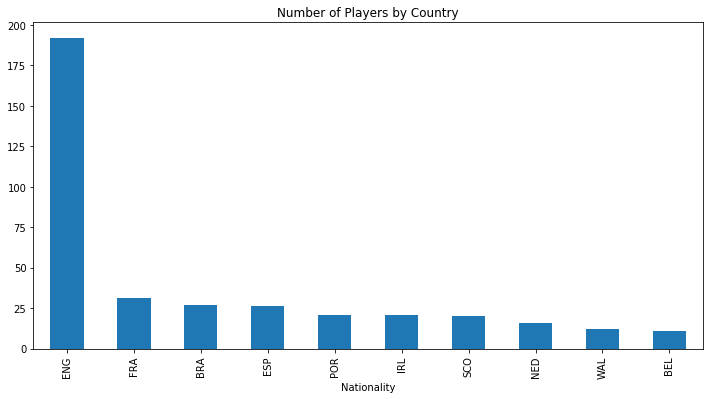

In [16]:
df.groupby('Nationality')['Name'].count().sort_values(ascending=False)[:10].plot.bar(title='Number of Players by Country',
                                                                                    figsize=(12,6), color=color);


**Note**
> Here we can see that, as expected, the nationality that has the most players in the Premier League are England, but some interesting fact is that Brazil is in third position, which is a thinhg in England given that we don't have a huge history of Brazilians doing well there.

In [17]:
# Let's see if goals by nationality follows the same pattern as the absolute number of players by nationality
goals_by_nationality = df.groupby('Nationality')['Goals'].sum().sort_values(ascending=False)[:10]
goals_by_nationality

Nationality
ENG    364
BRA     62
POR     57
FRA     51
BEL     34
ESP     33
SCO     28
GER     27
CIV     27
EGY     25
Name: Goals, dtype: int64

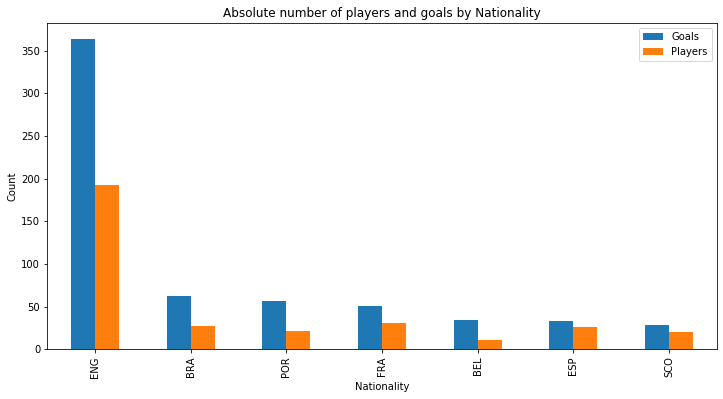

In [18]:
# Let's visualize the graph for both goals by nationality and players by nationality
pd.concat([goals_by_nationality, players_by_nationality], axis=1, sort=False, join='inner').plot.bar(figsize=(12,6));
plt.title('Absolute number of players and goals by Nationality');
plt.ylabel('Count');
plt.legend(['Goals', 'Players']);

**Note**
> Since this absolute comparison doesn't give us any real good information, let's consider the rate.

In [19]:
# Creating the rate's df
players_by_nationality = df.groupby('Nationality')['Name'].count()
goals_by_nationality = df.groupby('Nationality')['Goals'].sum()

df_Goals_Nationality = pd.concat([players_by_nationality, goals_by_nationality], axis=1, sort=False, join='inner')

In [20]:
# Creating the Rate column in the new df
df_Goals_Nationality['Rate'] = df_Goals_Nationality['Goals'] / df_Goals_Nationality['Name']

In [21]:
df_Goals_Nationality.head(10)

,Name,Goals,Rate
Nationality,,,
ALG,3,10,3.333333
ARG,8,8,1.000000
AUS,4,0,0.000000
AUT,1,0,0.000000
BEL,11,34,3.090909
BFA,1,7,7.000000
BIH,1,0,0.000000
BRA,27,62,2.296296
CAN,1,0,0.000000


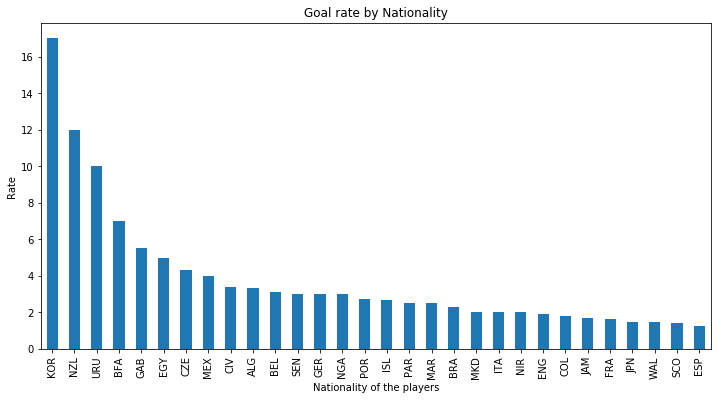

In [22]:
df_Goals_Nationality['Rate'].sort_values(ascending=False)[:30].plot.bar(figsize=(12,6));
plt.title('Goal rate by Nationality');
plt.ylabel('Rate');
plt.xlabel('Nationality of the players');

##### Answer to question #1

As expected, England leads the absolute number of players that make at least one game in the Premier League, followed by France, Brazil and Spain, when we look at the absolute number of goals, we could see some little changes in the top 10 order, for example, we could see that although Brazil and Portugal have a lower absolute number os players value compared to France, they both got more goals, and this was also the case for Belgium and Spain respectivelly.

But we know that the absolute values don't seems to give us all the picture that we would like to see, so when I compared the countries' goals rate, I could see some real change in the way results were presented, for example, from here we could see that some nations that are not so famous in football got some real good rates this season, as we can see in the likes of South korea and New Zealand, that are the top two nations by rate of goals. We also could see that Belgium, which is the top 11 nation by rate of goal, is the best placed nation when we compare only the nations that also appeared in the Absolute number of goals visualization.

### Question #2
> Which clubs made more goals this season, and what were the expected goals for them? in which way can we compare the expected goals and actual goals made by club?

In [23]:
goals_per_club = df.groupby('Club')['Goals'].sum().sort_values(ascending=False)
goals_per_club

Club
Manchester City            82
Manchester United          70
Tottenham Hotspur          66
Liverpool FC               65
Leicester City             64
Leeds United               60
West Ham United            60
Chelsea                    56
Arsenal                    53
Aston Villa                52
Southampton                47
Everton                    45
Newcastle United           44
Crystal Palace             39
Brighton                   39
Wolverhampton Wanderers    34
West Bromwich Albion       33
Burnley                    32
Fulham                     26
Sheffield United           19
Name: Goals, dtype: int64

In [24]:
goals_per_club_penalty = df.groupby('Club')['Penalty_Goals'].sum().sort_values(ascending=False)
goals_per_club_penalty

Club
Leicester City             10
Manchester United          10
Chelsea                     8
Newcastle United            6
Brighton                    6
Liverpool FC                6
Arsenal                     6
Manchester City             5
Southampton                 5
Tottenham Hotspur           5
Aston Villa                 5
Leeds United                4
Everton                     4
West Bromwich Albion        4
Wolverhampton Wanderers     4
Sheffield United            3
Fulham                      3
Crystal Palace              3
Burnley                     3
West Ham United             2
Name: Penalty_Goals, dtype: int64

**Note** 
> Here I can create a column that holds the value for the expected goals in total number per players, in order to use in the club's analysis.

In [25]:
# Creating the column mentioned above
df['xG_Total'] = df['xG']*df['Matches']
df.head(3)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,xG_Total
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,7.56
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,0.00
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,14.35


In [26]:
# Creating expected goals for club
x_goals_per_club = (df.groupby('Club')['xG_Total'].sum()).sort_values(ascending=False)
x_goals_per_club

Club
Manchester City            94.09
Liverpool FC               92.99
Chelsea                    91.11
Arsenal                    80.95
Manchester United          79.41
Leeds United               76.49
Brighton                   74.19
Tottenham Hotspur          73.91
Aston Villa                71.69
Leicester City             71.23
West Ham United            69.01
Everton                    60.17
Newcastle United           59.11
Fulham                     58.25
Wolverhampton Wanderers    57.46
Southampton                54.70
Burnley                    53.53
Sheffield United           47.65
West Bromwich Albion       47.30
Crystal Palace             43.09
Name: xG_Total, dtype: float64

In [27]:
# Creating a dataframe in order to better analyse these information.
club_df = pd.DataFrame(pd.concat([x_goals_per_club, goals_per_club], axis=1, sort=False))
club_df

,xG_Total,Goals
Manchester City,94.09,82
Liverpool FC,92.99,65
Chelsea,91.11,56
Arsenal,80.95,53
Manchester United,79.41,70
Leeds United,76.49,60
Brighton,74.19,39
Tottenham Hotspur,73.91,66
Aston Villa,71.69,52
Leicester City,71.23,64


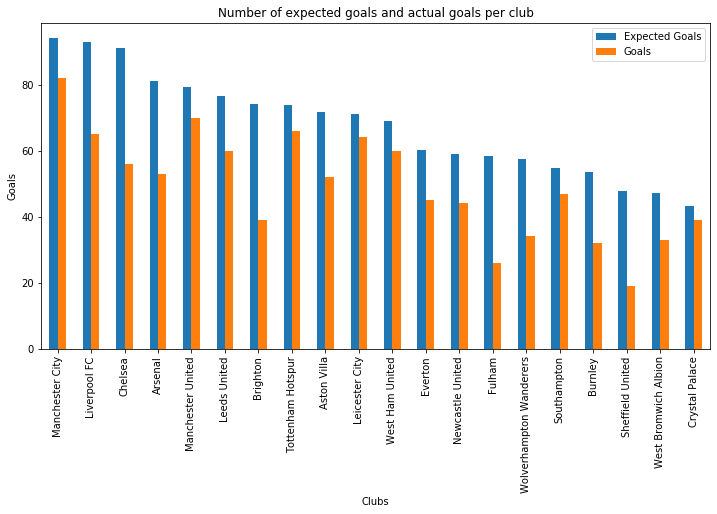

In [28]:
club_df.plot.bar(title='Number of expected goals and actual goals per club',
                figsize=(12,6),legend=True);
plt.ylabel('Goals');
plt.xlabel('Clubs');
plt.legend(['Expected Goals', 'Goals']);

##### Answer to question #2
As we could see, both clubs from Manchester made more goals than any other club this season, with `Manchester City` getting **82** goals and `Manchester United` getting **70** goals.

When we compare these numbers to the expected goals for each club, we can see that this variable was really misscalculated, as we can see that no club did achieve the number of goals that were expected from them.

If we can highligh a club that did really bad in terms of what were expected in terms of goals and what did the club actually delivered, we can see that `Sheffield United` had a disastrous season, with an **expected goals of 48**, and actuallt getting only **19** goals.



### Question #3
> What are the positions, the players and the clubs that have the highest and lowest percentage of passes completed?

In [29]:
df.groupby('Position')['Perc_Passes_Completed'].mean().sort_values(ascending=False)

Position
MF    80.901274
DF    80.267337
FW    73.332836
GK    69.119048
Name: Perc_Passes_Completed, dtype: float64

**Note**
> Here we can see that the Goalkeeper is the position with the lowest percentage of passes completed

In [30]:
df.groupby('Club')['Perc_Passes_Completed'].mean().sort_values(ascending=False)

Club
Manchester City            86.733333
Chelsea                    84.033333
Liverpool FC               83.453571
Fulham                     81.710714
Manchester United          81.662069
Wolverhampton Wanderers    81.318519
Arsenal                    81.262069
Everton                    79.520690
Leeds United               79.382609
Leicester City             79.240741
Aston Villa                76.795833
West Ham United            76.495833
Tottenham Hotspur          76.045833
Newcastle United           75.085185
Crystal Palace             74.529167
Sheffield United           74.074074
Southampton                72.955172
West Bromwich Albion       72.383333
Brighton                   71.988889
Burnley                    67.456000
Name: Perc_Passes_Completed, dtype: float64

**Note**
> Regarding the clubs, I could see some interesting results, first is to have `Fulham` in the top 4, considering that they were relegated, second is to see `Tottenham Hotspur` only in the 13th position.

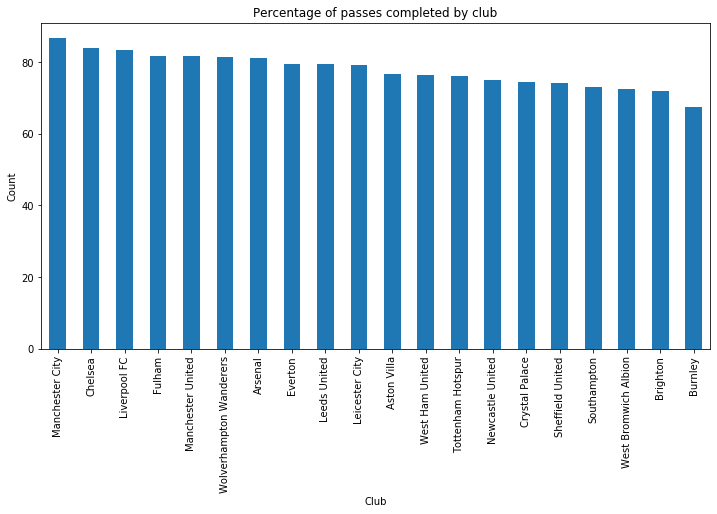

In [31]:
df.groupby('Club')['Perc_Passes_Completed'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6));
plt.ylabel('Count')
plt.xlabel('Club')
plt.title('Percentage of passes completed by club');

In [32]:
# as I'm going to filter some columns in order to get only players that have a certain rate
# of appearences for their clubs in the season, I'll create a function to do this for me;

def get_players(df, column_name, rate=0.70):
    '''
    INPUT:
    df - a pandas dataframe that you want to get information for players
    column_name - the name of the column that you want the function to use as a parameter
    rate - the minimum rate of games played for each player, DEFAULT = .70
    
    OUTPUT:
    mod_df - a new dataframe that contains only players that have more games than the rate.
    '''
    
    mod_df = df[df[column_name] >= 38* rate]
    return mod_df

In [33]:
# Considering only players that have played at least, 70% of the matches.
# Let's see which are the players have the highest percentage of passes completed
new_df = get_players(df, 'Matches')

In [34]:
new_df.groupby(['Name', 'Position', 'Club'])['Perc_Passes_Completed'].mean().sort_values(ascending=False)[:10]

Name                 Position  Club             
Rúben Dias           DF        Manchester City      93.6
Georginio Wijnaldum  MF        Liverpool FC         93.3
Rodri                MF        Manchester City      91.5
Fabinho              DF        Liverpool FC         91.1
Victor Lindelöf      DF        Manchester United    91.1
Mateo Kovačić        MF        Chelsea              91.0
İlkay Gündoğan       MF        Manchester City      91.0
Lewis Dunk           DF        Brighton             90.0
Granit Xhaka         MF        Arsenal              89.9
Jorginho             MF        Chelsea              89.5
Name: Perc_Passes_Completed, dtype: float64

In [35]:
# Considering only players that have played at least, 70% of the matches
# let's see which players have the lowest percentage of passes completed
new_df.groupby(['Name', 'Position','Club'])['Perc_Passes_Completed'].mean().sort_values(ascending=True)[:10]


Name               Position  Club                   
Aaron Ramsdale     GK        Sheffield United           49.1
Sam Johnstone      GK        West Bromwich Albion       49.9
Nick Pope          GK        Burnley                    50.7
Vicente Guaita     GK        Crystal Palace             55.4
Darnell Furlong    DF        West Bromwich Albion       59.5
Łukasz Fabiański   GK        West Ham United            60.5
Christian Benteke  FW        Crystal Palace             63.8
Alex McCarthy      GK        Southampton                64.3
Emiliano Martínez  GK        Aston Villa                65.6
Adama Traoré       FW        Wolverhampton Wanderers    65.9
Name: Perc_Passes_Completed, dtype: float64

**Note**
> Considering that we got 7 goalkeepers, and that they indeed are the position that has the lowest percentage of passes completed, let's try to disconsider all the goalkeepers in order to see if we find something interesting.

In [36]:
# Considering only players that have played at least, 70% of the matches
# Let's see the statistic without considering GoalKeepers
new_df[new_df['Position'] != 'GK'].groupby(['Name', 'Position','Club'])['Perc_Passes_Completed'].mean().sort_values(ascending=True)[:10]


Name                  Position  Club                   
Darnell Furlong       DF        West Bromwich Albion       59.5
Christian Benteke     FW        Crystal Palace             63.8
Adama Traoré          FW        Wolverhampton Wanderers    65.9
Dara O'Shea           DF        West Bromwich Albion       66.0
Danny Ings            FW        Southampton                66.3
Jamie Vardy           FW        Leicester City             66.4
Raphael Dias Belloli  MF        Leeds United               66.7
Chris Wood            FW        Burnley                    66.9
Jack Harrison         MF        Leeds United               67.8
Andros Townsend       MF        Crystal Palace             67.9
Name: Perc_Passes_Completed, dtype: float64

In [37]:
# The mean percentage of passes completed for the players that have played at least, 70% of the matches.
mean_Perc_Passes_Completed = new_df['Perc_Passes_Completed'].mean()
mean_Perc_Passes_Completed

77.97460317460312

In [38]:
# Let's see the actual percentages of passes completed for each goalkeeper that have played at least 70% of the matches
new_df[new_df['Position'] == 'GK'].groupby(['Name', 'Position','Club'])['Perc_Passes_Completed'].mean().sort_values(ascending=False)


Name               Position  Club                   
Alisson            GK        Liverpool FC               85.2
Edouard Mendy      GK        Chelsea                    84.6
Ederson            GK        Manchester City            83.1
Illan Meslier      GK        Leeds United               80.9
Bernd Leno         GK        Arsenal                    79.8
Alphonse Areola    GK        Fulham                     73.6
Kasper Schmeichel  GK        Leicester City             72.7
Robert Sánchez     GK        Brighton                   71.6
Hugo Lloris        GK        Tottenham Hotspur          71.5
Rui Patrício       GK        Wolverhampton Wanderers    66.7
Jordan Pickford    GK        Everton                    66.1
Emiliano Martínez  GK        Aston Villa                65.6
Alex McCarthy      GK        Southampton                64.3
Łukasz Fabiański   GK        West Ham United            60.5
Vicente Guaita     GK        Crystal Palace             55.4
Nick Pope          GK        Bur

In [39]:
# Now we can see which goalkeepers got a percentage of passes completed above the average
new_df[new_df['Position'] == 'GK'].groupby(['Name', 'Position','Club'])['Perc_Passes_Completed'].mean().sort_values(ascending=False) >= mean_Perc_Passes_Completed



Name               Position  Club                   
Alisson            GK        Liverpool FC                True
Edouard Mendy      GK        Chelsea                     True
Ederson            GK        Manchester City             True
Illan Meslier      GK        Leeds United                True
Bernd Leno         GK        Arsenal                     True
Alphonse Areola    GK        Fulham                     False
Kasper Schmeichel  GK        Leicester City             False
Robert Sánchez     GK        Brighton                   False
Hugo Lloris        GK        Tottenham Hotspur          False
Rui Patrício       GK        Wolverhampton Wanderers    False
Jordan Pickford    GK        Everton                    False
Emiliano Martínez  GK        Aston Villa                False
Alex McCarthy      GK        Southampton                False
Łukasz Fabiański   GK        West Ham United            False
Vicente Guaita     GK        Crystal Palace             False
Nick Pope        

##### Answer to question #3

Answering the question number 3 gave me some interesting results that I thought were exactly the opposite, for example, I thought that the defenders and the goalkeepers were the positions that got the highest percentage of passes completed, since they usually passes the ball to players that are near them, and although my first thought was in this direction, the truth is that the midfielders were the position that got the highest percentage, with almost 81%, nearly followed by the defenders with 80%, and then by the forwards, which only got about 73%.

When we see this statistic by club, we see that the top 3 is kind of what we would expect, since they are all big clubs that tend to maintain the possession of the ball, but following along the table, I found interesting that a big club like Tottenham Hotspur only figured in the 13th position.

I also analysed the statistic by players, in order to see which of them had the highest and lowest percentages, and regarding the highest, we can see an interesting fact, in the top 10, only 3 players do not belong to the top 3 clubs, and from these players, only Lewis Dunk, from Brighton plays for a club that is not considered to be in the big six of Englans (Manchester City, Manchester United, Arsenal, Tottenham, Chelsea, and Liverpool).

And regarding the players that had the lowest percentage of passes completed, I first saw the data for the lowest 10 players that played at least 70% of the matches, and I noticed that from this visualization, only 3 players were not goalkeepers, so I decided to separate them, in order to see what happens.

When I did not considered the goalkeepers, I found that the 10 lowest percentages are from players that belong to small and medium size clubs, which is mostly likely what we expect to be.

To finish, I analysed the goalkeepers, and I found that only 5 out of 18 sits above the average percentage of passes completed, and here I would like to highlight the impressive percentage of passes completed by the Leeds United goalkeeper, Illan Meslier, which is the only goalkeeper to have a percentage above the average that does not plays for a England big six club.


### Question #4
> What are the players that scored more goals? What are the players that did better and worse comparing their actual goals scored and the expected goals?

In [40]:
# let's consider only players that have played at least 70% of their club matches for the entire question
new_df.groupby(['Name', 'Club'])['Goals'].sum().sort_values(ascending=False)[:10]

Name                   Club             
Harry Kane             Tottenham Hotspur    23
Mohamed Salah          Liverpool FC         22
Bruno Fernandes        Manchester United    18
Son Heung-min          Tottenham Hotspur    17
Patrick Bamford        Leeds United         17
Dominic Calvert-Lewin  Everton              16
Jamie Vardy            Leicester City       15
Ollie Watkins          Aston Villa          14
İlkay Gündoğan         Manchester City      13
Alexandre Lacazette    Arsenal              13
Name: Goals, dtype: int64

**Note**
>Surprinsigly, we have two Tottenham players here, and considering that they are only the 13th team that completes more passes, we can immagine that they play on a fast and direct way.

In [41]:
# What is the rate of Tottenham Goals that were scored by either Harry Kane or Son Houng-min?
print('The rate of Tottenham goals that were scored by either Kane or Son is {}%'.format(round((df[(df['Name'] == 'Harry Kane') | (df['Name'] == 'Son Heung-min')]['Goals'].sum() / df[df['Club'] == 'Tottenham Hotspur']['Goals'].sum())*100),2))



The rate of Tottenham goals that were scored by either Kane or Son is 61.0%


**Note**
>Here we can see the impact that only two players have in the whole team, and although Tottenham is far from what we would expect in terms of passes completed, we can easily say that both Kane and Son did really well in the league this season.

In [42]:
# Let's see what are the players that have the higher expect goals
new_df.groupby(['Name', 'Club'])['xG'].mean().sort_values(ascending=False)[:10]

Name                   Club             
Jamie Vardy            Leicester City       0.62
Mohamed Salah          Liverpool FC         0.61
Harry Kane             Tottenham Hotspur    0.60
Patrick Bamford        Leeds United         0.51
Sadio Mané             Liverpool FC         0.49
Dominic Calvert-Lewin  Everton              0.48
Neal Maupay            Brighton             0.46
Alexandre Lacazette    Arsenal              0.46
Bruno Fernandes        Manchester United    0.45
Anwar El Ghazi         Aston Villa          0.45
Name: xG, dtype: float64

In [43]:
# Since this value alone does not give us much information, let's transform the data in order to see if we
# get some insights ...
# Creating a Goal_Rate column
new_df['Goal_Rate'] = new_df['Goals'] / new_df['Matches']
new_df.head(3)

/Users/guilhermemello/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,xG_Total,Goal_Rate
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,7.56,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,0.00,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,14.35,0.171429


**Note**
> Here we can also use the column that were created later in this notebook, which is the Total number of expected goals by player, the `xG_Total` column.

In [44]:
#Inspecting the column
new_df.head(3)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,xG_Total,Goal_Rate
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,7.56,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,0.00,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,14.35,0.171429


In [45]:
# Looking at the top 10 players by goal rate
new_df.groupby(['Name', 'Club'])['Goal_Rate', 'xG', 'Goals', 'xG_Total'].mean().sort_values(by='Goal_Rate',ascending=False)[:10]



,,Goal_Rate,xG,Goals,xG_Total
Name,Club,,,,
Harry Kane,Tottenham Hotspur,0.657143,0.60,23,21.00
Mohamed Salah,Liverpool FC,0.594595,0.61,22,22.57
Bruno Fernandes,Manchester United,0.486486,0.45,18,16.65
Dominic Calvert-Lewin,Everton,0.484848,0.48,16,15.84
İlkay Gündoğan,Manchester City,0.464286,0.40,13,11.20
Son Heung-min,Tottenham Hotspur,0.459459,0.30,17,11.10
Patrick Bamford,Leeds United,0.447368,0.51,17,19.38
Jamie Vardy,Leicester City,0.441176,0.62,15,21.08
Alexandre Lacazette,Arsenal,0.419355,0.46,13,14.26


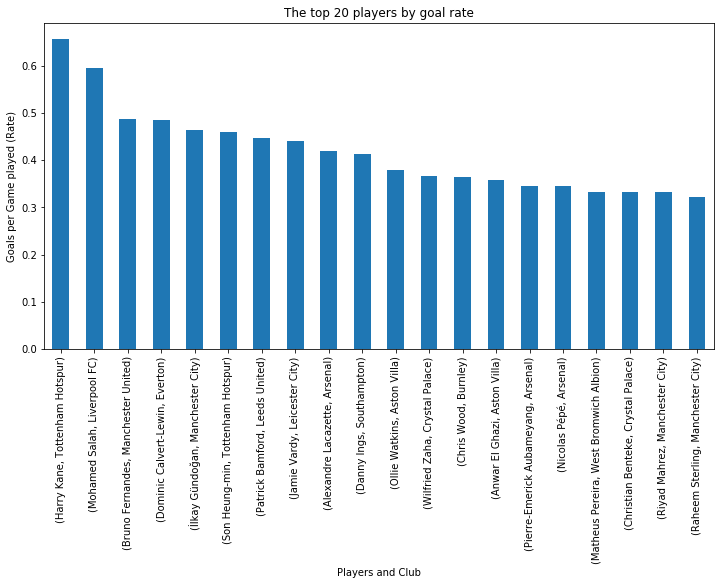

In [46]:
new_df.groupby(['Name', 'Club'])['Goal_Rate'].mean().sort_values(ascending=False)[:20].plot.bar(figsize=(12,6));
plt.title('The top 20 players by goal rate');
plt.ylabel('Goals per Game played (Rate)');
plt.xlabel('Players and Club');


**Note**
> We can see that the top three scorers in absolute number of goals are also the top three when we look at the rate of goals, and an insight here is regarding the midfielder Ikay Gundogan, which has the fifth higher goal rate, but appears only in the 9th place in the absolute number of goals. Maybe he deverved more games to play?

**Note**

> From now we can get some insight from the data, and here I will create a column that holds the difference between the actual goals a player scored and the expected total goals for that player, so we can see what players did better than expected and what players did worse.

In [47]:
# Creating the column mentioned above
new_df['Goals_diff'] = new_df['Goals'] - new_df['xG_Total']
new_df.head(3)

/Users/guilhermemello/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,xG_Total,Goal_Rate,Goals_diff
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,...,82.3,1,1,0.21,0.24,2,0,7.56,0.166667,-1.56
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,84.6,0,0,0.00,0.00,2,0,0.00,0.000000,0.00
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,77.2,0,0,0.41,0.21,2,0,14.35,0.171429,-8.35


In [48]:
# The players that did better than expected in terms of goals
new_df.groupby(['Name', 'Club'])['Goals_diff'].sum().sort_values(ascending=False)[:10]

Name               Club                
Son Heung-min      Tottenham Hotspur       5.90
Stuart Dallas      Leeds United            3.44
Wilfried Zaha      Crystal Palace          3.20
Matheus Pereira    West Bromwich Albion    2.75
James Ward-Prowse  Southampton             2.68
Lewis Dunk         Brighton                2.36
Danny Ings         Southampton             2.14
James Maddison     Leicester City          2.11
Harry Kane         Tottenham Hotspur       2.00
Riyad Mahrez       Manchester City         1.98
Name: Goals_diff, dtype: float64

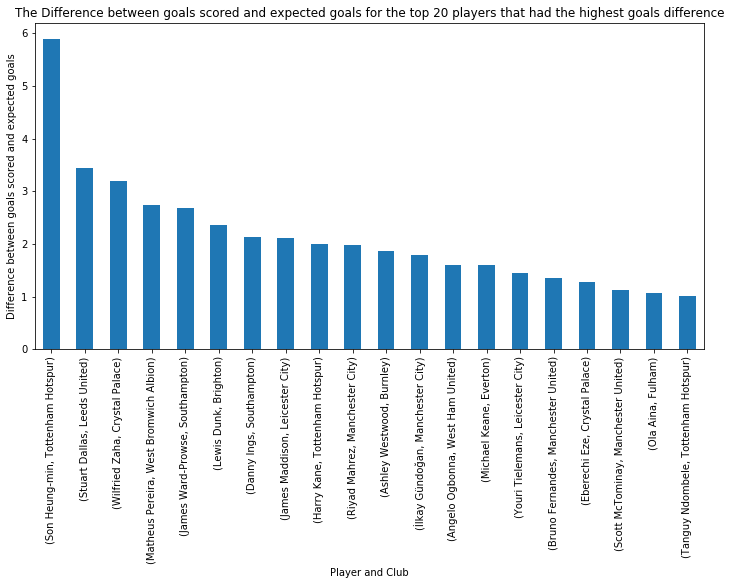

In [49]:
new_df.groupby(['Name', 'Club'])['Goals_diff'].sum().sort_values(ascending=False)[:20].plot.bar(figsize=(12,6));
plt.title('The Difference between goals scored and expected goals for the top 20 players that had the highest goals difference');
plt.ylabel('Difference between goals scored and expected goals');
plt.xlabel('Player and Club');




**Note**
> This graph shows us the difference between actual goals scored by players and what was the expected goals for them. So this implies that these are the top 20 players that have the better than expected performance in the league this season, when we focus on goals.

In [50]:
# But what are the players that did worse than expected from them in terms of goals?
new_df.groupby(['Name', 'Club'])['Goals_diff'].sum().sort_values(ascending=False)[-10:]

Name                 Club                   
Richarlison          Everton                   -5.24
Roberto Firmino      Liverpool FC              -5.40
Kai Havertz          Chelsea                   -5.99
Jamie Vardy          Leicester City            -6.08
Sadio Mané           Liverpool FC              -6.15
Neal Maupay          Brighton                  -7.18
Matěj Vydra          Burnley                   -8.20
Aleksandar Mitrović  Fulham                    -8.34
Timo Werner          Chelsea                   -8.35
Fábio Silva          Wolverhampton Wanderers   -8.80
Name: Goals_diff, dtype: float64

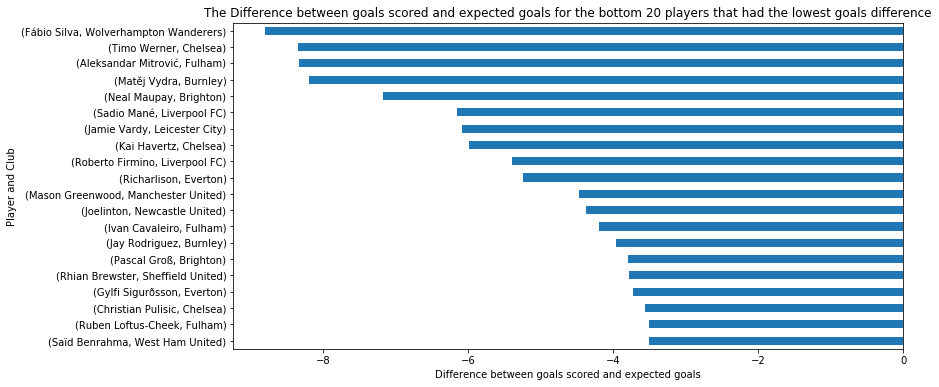

In [51]:
new_df.groupby(['Name', 'Club'])['Goals_diff'].sum().sort_values(ascending=False)[-20:].plot.barh(figsize=(12,6));
plt.title('The Difference between goals scored and expected goals for the bottom 20 players that had the lowest goals difference');
plt.ylabel('Player and Club');
plt.xlabel('Difference between goals scored and expected goals');



**Note**
> Here we can see what are the players that did worse then expected from them, in terms of goals, and here, I can easily highlight four players, which are `Timo Werner` and `Kai Havertz` from `Chelsea` and `Sadio Mané` and `Roberto Firmino` from `Liverpool`.

In [52]:
# What are the ages for these players?
new_df[(new_df['Name'] == 'Timo Werner') | (new_df['Name'] == 'Kai Havertz') | (new_df['Name'] == 'Sadio Mané') | (new_df['Name'] == 'Roberto Firmino')][['Name','Age']]



,Name,Age
2,Timo Werner,24
13,Kai Havertz,21
85,Roberto Firmino,28
86,Sadio Mané,28


**Note**
> Here we can think if the age influences the fact that these players performed really bad this season, and here we can think of two clusters, for example, the first is regarding players that are young and have a lot of potential to develop, and the other would be players that are reaching the down curve of their careers, but this is a subject for further investigation, as we do not have enough data to do this right now.

##### Answer to question #4

When we look at goals scored, we can see that Harry Kane and Mohamed Salah did really well, finishing the season as the top two goals scorers, but when we transform the data to see some hidden insights, we could also see that some players did really well regarding what were expected from them in terms of goals, and here we can highlight some players, for example, Son Heung-min that plays for Tottenham, Stuart Dallas from Leeds and Wilfried Zaha from Crystal Palace, whcih have the top three differences between goals scored and expected goals scored.

Looking at the players that did not perform well this season, we could see some interesting results in the names of Timo Werner from Chelsea that had almost nine goals less than what were expected from him, and Sadio Mané from Liverpool that scored almost seven goals less than what were expected from him.